<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Description</a></span><ul class="toc-item"><li><span><a href="#The-Data" data-toc-modified-id="The-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Data</a></span></li><li><span><a href="#Modeling-Goals" data-toc-modified-id="Modeling-Goals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Modeling Goals</a></span></li></ul></li><li><span><a href="#Tasks" data-toc-modified-id="Tasks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tasks</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Basic-Model" data-toc-modified-id="Basic-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Basic Model</a></span></li><li><span><a href="#Improved-Model---Trend" data-toc-modified-id="Improved-Model---Trend-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Improved Model - Trend</a></span><ul class="toc-item"><li><span><a href="#Model-Code" data-toc-modified-id="Model-Code-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Model Code</a></span></li><li><span><a href="#Results-&amp;-Samples" data-toc-modified-id="Results-&amp;-Samples-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Results &amp; Samples</a></span></li><li><span><a href="#Visualization-of-Fit" data-toc-modified-id="Visualization-of-Fit-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Visualization of Fit</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#Improved-Model---Seasonality" data-toc-modified-id="Improved-Model---Seasonality-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Improved Model - Seasonality</a></span><ul class="toc-item"><li><span><a href="#Model-Code" data-toc-modified-id="Model-Code-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Model Code</a></span></li><li><span><a href="#Results-&amp;-Samples" data-toc-modified-id="Results-&amp;-Samples-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Results &amp; Samples</a></span></li><li><span><a href="#Visualization-of-Fit" data-toc-modified-id="Visualization-of-Fit-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Visualization of Fit</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Posterior-Predictive-Checks" data-toc-modified-id="Posterior-Predictive-Checks-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Posterior Predictive Checks</a></span></li></ul></li></ul></div>

## Project Description

Modeling and forecasting atmospheric CO₂ from 1958 until 2058
Since 1958 atmospheric carbon dioxide measurements
have been recorded at the Mauna Loa Observatory in
Hawaii. [CO2
levels have been increasing steadily since the
start of the industrial revolution](https://www.acs.org/content/acs/en/climatescience/greenhousegases/industrialrevolution.html) in the 18th century.

Older data are from ice core measurements, not
atmospheric measurements. The data from Mauna Loa
provide very direct data on atmospheric CO2
, which forms
an important part of global climate change modeling.

We will use the [weekly Mauna Loa data set](https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv) from the [Scripps CO2program](https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html).

Your task is to create a statistical model that explains this data set well and to use it to forecast
what measurements will look like **between now and the start of 2059 — 40 years from now**. Your
model should reflect the uncertainty you have in your predictions, showing confidence intervals
widening as we go further away from the present time. You will also use the model to predict
when we are likely to reach high-risk levels of CO2 with a greater probability of serious climate
change

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
import seaborn as sns
import scipy
import numpy as np

### The Data

The weekly Mauna Loa data set has 2 columns — the date and the measurement of CO2 ppm
(parts per million). For modeling purposes we represent time, t, using the number of days since
measurements started in 1958, and the measured value, $x_t$, as the CO2 ppm measurement. 

The data file has general information at the top and starts at line 45, so we'll import starting from that line (skiprows is 0-indexed).

In [3]:
data = pd.read_csv('weekly_in_situ_co2_mlo.csv', skiprows=44, names=['Date', "CO2"])
print(data.shape)
data.head()

(3139, 2)


,Date,CO2
0,1958-03-29,316.19
1,1958-04-05,317.31
2,1958-04-12,317.69
3,1958-04-19,317.58
4,1958-04-26,316.48


Since we are modelling the x-axis of our plot as days passed since the first measurement, let's generate a column with that information to pass to our model.

In [4]:
data["Days"] = ((pd.to_datetime(data.Date) - pd.to_datetime(data.Date[0])).dt.days)
data["Years"] = ((pd.to_datetime(data.Date) - pd.to_datetime(data.Date[0])).dt.days / 365.25)

data.tail()

,Date,CO2,Days,Years
3134,2019-08-31,409.32,22435,61.423682
3135,2019-09-07,408.80,22442,61.442847
3136,2019-09-14,408.61,22449,61.462012
3137,2019-09-21,408.50,22456,61.481177
3138,2019-09-28,408.28,22463,61.500342


Let's take a look at some summary statistics that might inform our prior later:

In [5]:
print(np.mean(data.CO2.values))
print(np.std(data.CO2.values))
print(np.min(data.CO2.values))
print(np.max(data.CO2.values))
print( (np.max(data.CO2.values - np.min(data.CO2.values))) / 22463)

355.08193373685884
27.994580071861737
313.04
415.08
0.004542581133419399


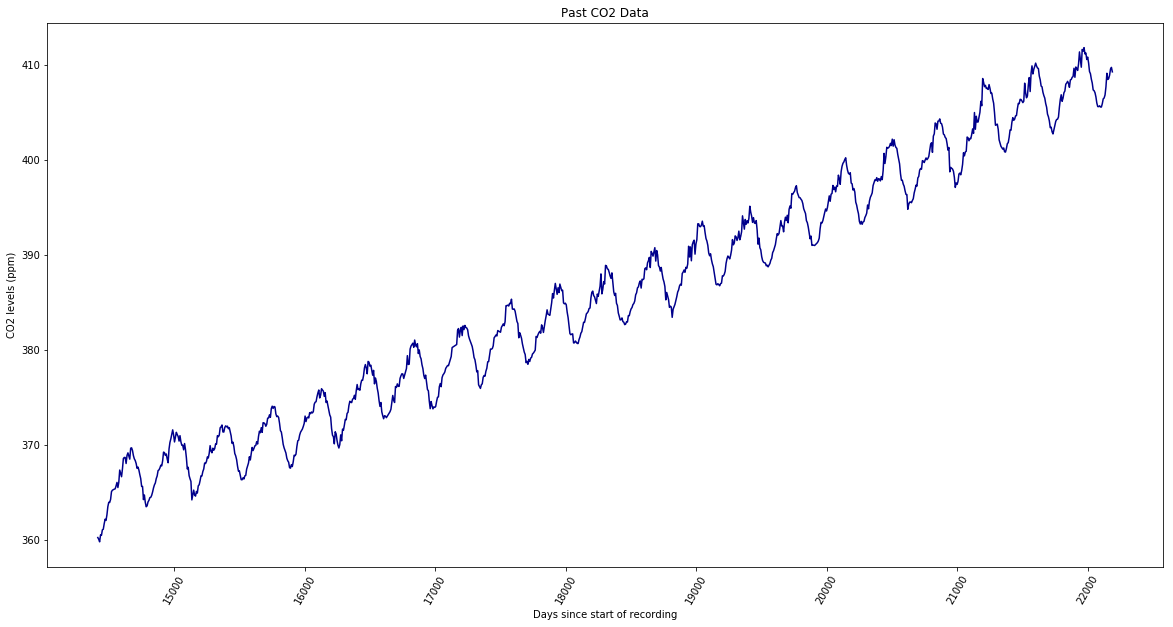

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(data['Days'][2000:3100], data['CO2'][2000:3100], color='darkblue')

plt.title('Past CO2 Data')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Days since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Past_trend.png")

### Modeling Goals
1. There is a very clear trend visible in the data set, but what type of trend is it — linear,
quadratic, exponential, something else?
2. There is a seasonal component. CO2 absorption by plants and emission and absorption
by humans depends on the seasons. Humans burn more stuff to stay warm in winter and
plants consume more CO2
in spring and summer when they grow. How would you model
this seasonal variation? (This activity does not average out between the northern and
southern hemisphere since atmospheric mixing is pretty slow.)
3. There is also a fair amount of random fluctuation in the data. The data curve is not
smooth and whether it is due to measurement error, or due to natural random
fluctuations of CO2
levels, we need a noise model to account for these fluctuations.

You are required to model three components:
- an overall trend
- seasonal variations
- and noise.

You will need to identify the parameters of your model, put priors over them, and calculate
posterior distributions so that you can predict what atmospheric CO2
levels will look like up to
the start of 2059.

## Tasks
Your primary tasks are to
- identify flaws in the basic model and to come up with
something better,
- do inference in your model using Python and Stan, to get approximate posterior
distributions over all your model parameters,
- use your posteriors to forecast what atmospheric CO2
levels at Mauna Loa will be for the next 40 years.


Use your model to answer the following questions:
- What is your best estimate for atmospheric CO2
levels projected until the start of 2059?
- What is your 95% confidence interval for atmospheric CO2
levels projected until the start
of 2059?
- Present your estimates on a graph.
- CO2 levels of 450 ppm are considered high risk for dangerous climate change. By when
is there a strong probability that will we reach those levels? Use your model to answer
this question, but present the results in a way that someone unfamiliar with statistics will
understand.
- Analyze the main shortcomings of your model. Where is there room for improvement?
Explore the statistical differences between your model and the real data.

## Modeling

### Data

In [7]:
stan_data_years = {
    "n" : len(data),
    "years" : data.Years.values,
    "CO2" : data.CO2.values
}

stan_data_years_normalized = {
    "n" : len(data),
    "years" : data.Years.values / np.max(data.Years.values),
    "CO2" : data.CO2.values
}

### Basic Model

- Long-term trend: linear, $c_0 + c_1 t$
- Seasonal variation (every 365¼ days): cosine, $c_2 cos(2\pi  t/365.25 + c_3)$
- Noise: Gaussian with 0 mean and fixed standard deviation, $c_4$
- The $c_i$ variables are all unobserved parameters of the model.


Combining these three components gives the following likelihood function:
$p(x_t | \theta) = N(c_0 + c_1 t + c_2 cos(2\pi  t/365.25 + c_3), c_4^2)$

where $\theta$ represents the set of all unobserved parameters. Since there are 3040 data, the full like
comprises a product overall 3040 values, $x_t$. To complete the model we would still need to define
priors over all 5 model parameters.

### Improved Model - Trend
Let's start with figuring out the ideal model for the long-term trend. The obvious solutions are linear, exponential and higher order polynomial trends, all of which we can model and test against the data. Since we want to keep complexity as low as possible, I'll start with a second order polynomial trend. No need to include more terms unless the model performs poorly otherwise.

- Linear: $c_0 + c_1 t$
- Exponential: $c_0 + c_1 e^{c_2 t}$
- Second Order Polynomial: $c_0 + c_1 t + c_2t^2$

Let's define some priors over those models as well. Given the amount of data we have, our priors should not impact our results too much, so let's pick them to be merely non-constraining (see in code below).

#### Model Code

In [8]:
linear_trend = """
data {
    int<lower=0> n;             // number of data
    real<lower=0> years[n];      // days since start of measurement
    real<lower=0> CO2[n];       // measured CO2 in ppm
}

parameters {
    real<lower=0> c0;                
    real<lower=0> c1;
    real<lower=0> noise;
}

model {
 
    // Priors
    c0 ~ normal(310, 30);       // based on data min value & stdev
    c1 ~ gamma(0.5, 0.5);       // rough guess on scale of the slope of the
                                // trend but with wide stdev
    noise ~ inv_gamma(10, 2);   // relatively uninformative prior on the same
                                // scale as the data
    
    // Trend Model
    for (i in 1:n) {
        CO2[i] ~ normal(c0 + c1*years[i], noise); 
    }
}

"""

exp_trend = """
data {
    int<lower=0> n;             // number of data
    real<lower=0> years[n];      // days since start of measurement
    real<lower=0> CO2[n];       // measured CO2 in ppm
}

parameters {
    real<lower=0> c0;                
    real<lower=0> c1;
    real<lower=0> noise;
}

model {
 
    // Priors
    c0 ~ normal(310, 30);       
    c1 ~ gamma(1, 1);         // expecting c1 to be relatively small 
    noise ~ inv_gamma(5, 2);      
    
    // Trend Model
    for (i in 1:n) {
        CO2[i] ~ normal(c0 * exp(c1 * years[i]), noise); 
    }
}

"""

poly_trend = """
data {
    int<lower=0> n;             // number of data
    real<lower=0> years[n];     // days since start of measurement
    real<lower=0> CO2[n];       // measured CO2 in ppm
}

parameters {
    real<lower=0> c0;                
    real<lower=0> c1;
    real<lower=0> c2;
    real<lower=0> noise;
}

model {
 
    // Priors
    c0 ~ normal(310, 30);       // based on data min value & stdev
    c1 ~ gamma(0.5, 0.5);       
    c2 ~ gamma(0.1, 0.1);       // narrowing the priors as we increase the
                                // polynomial order
    noise ~ normal(10, 2);    
    
    // Trend Model
    for (i in 1:n) {
        CO2[i] ~ normal(c0 + c1 * years[i] + c2 * (years[i]^2), noise); 
    }
}

"""

In [211]:
linear_model = pystan.StanModel(model_code=linear_trend)
exp_model = pystan.StanModel(model_code=exp_trend)
poly_model = pystan.StanModel(model_code=poly_trend)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cc3698ebe6ae04aa992093d5a338c916 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d5fee82b6d9ef1d0839cdf0c66965673 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e3c4b53baf102b05bc260c625b4e33af NOW.


#### Results & Samples

Beautifully narrow posteriors on my linear model, Rhat indicates convergence and we have a large effective sample size. Note that $c_1$ is a very small parameter, as was to be expected, since we are modelling the changes in days.

In [212]:
linear_results = linear_model.sampling(data=stan_data_years, n_jobs=3)
linear_samples = linear_results.extract()
print(linear_results)

Inference for Stan model: anon_model_cc3698ebe6ae04aa992093d5a338c916.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0    306.06  3.3e-3   0.15 305.76 305.96 306.06 306.17 306.36   2152    1.0
c1      1.57  9.6e-5 4.2e-3   1.57   1.57   1.57   1.58   1.58   1921    1.0
noise   4.26  1.6e-3   0.05   4.16   4.22   4.26    4.3   4.37   1198    1.0
lp__   -6134    0.03   1.22  -6138  -6135  -6134  -6133  -6133   1228    1.0

Samples were drawn using NUTS at Mon Dec 16 14:31:07 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


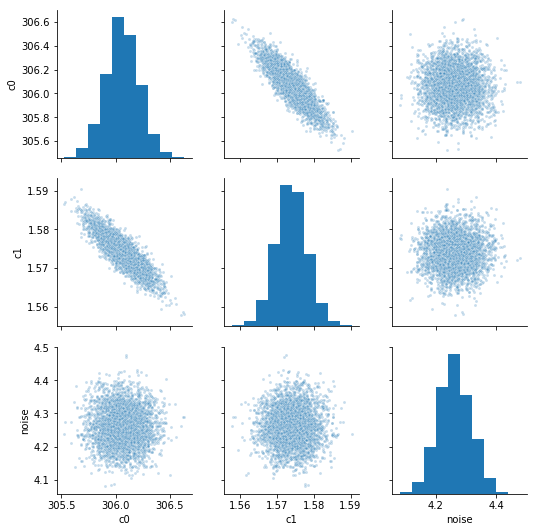

In [224]:
parameters = ['c0', 'c1', 'noise']

df = pd.DataFrame(
    data=np.transpose([linear_samples[param] for param in parameters]),
    columns=parameters)
sns.pairplot(df, height=2.5, plot_kws={'marker': '.', 'alpha': 0.25})
plt.show()

Note that the exponential model uses the normalized data instead of total days, since it will not converge otherwise.

In [213]:
exp_results = exp_model.sampling(data=stan_data_years_normalized, n_jobs=3) #, control={'adapt_delta' : 0.999}) 
exp_samples = exp_results.extract()
print(exp_results)

Inference for Stan model: anon_model_d5fee82b6d9ef1d0839cdf0c66965673.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0    307.98  3.1e-3   0.12 307.74  307.9 307.98 308.06 308.21   1479    1.0
c1      0.27  1.7e-5 6.3e-4   0.27   0.27   0.27   0.28   0.28   1293   1.01
noise   3.47  1.7e-3   0.04   3.39   3.44   3.47    3.5   3.56    708   1.01
lp__   -5479    0.04   1.25  -5483  -5480  -5479  -5478  -5478   1123    1.0

Samples were drawn using NUTS at Mon Dec 16 14:31:59 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


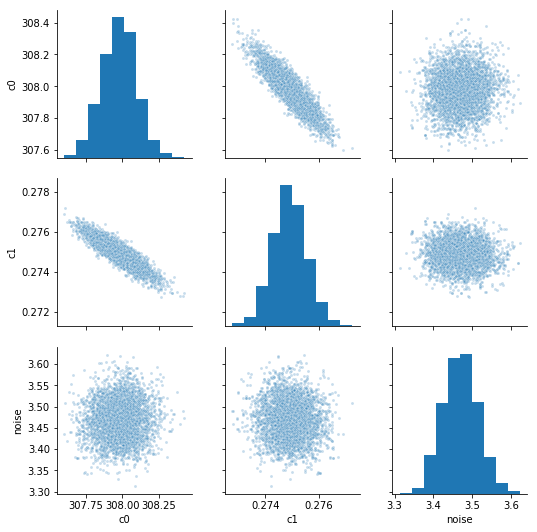

In [214]:
parameters = ['c0', 'c1', 'noise']

df = pd.DataFrame(
    data=np.transpose([exp_samples[param] for param in parameters]),
    columns=parameters)
sns.pairplot(df, height=2.5, plot_kws={'marker': '.', 'alpha': 0.25})
plt.show()

In [10]:
poly_results = poly_model.sampling(data=stan_data_years, n_jobs=3) 
poly_samples = poly_results.extract()
print(poly_results)

Inference for Stan model: anon_model_869ea7040d007045b0646245336ffe33.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0    314.58  3.4e-3   0.13 314.33 314.49 314.57 314.66 314.83   1406    1.0
c1      0.77  2.9e-4 9.4e-3   0.75   0.76   0.77   0.77   0.79   1093    1.0
c2      0.01  4.5e-6 1.5e-4   0.01   0.01   0.01   0.01   0.01   1103    1.0
noise   2.25  7.7e-4   0.03    2.2   2.23   2.25   2.27   2.31   1306   1.01
lp__   -4117    0.04   1.41  -4120  -4117  -4116  -4115  -4115   1113    1.0

Samples were drawn using NUTS at Wed Dec 18 10:53:31 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


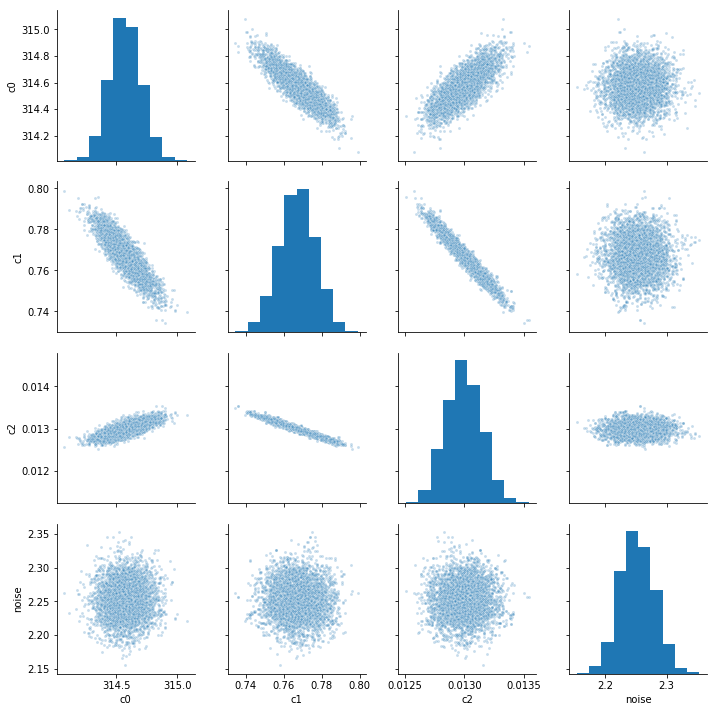

In [11]:
parameters = ['c0', 'c1', 'c2', 'noise']

df = pd.DataFrame(
    data=np.transpose([poly_samples[param] for param in parameters]),
    columns=parameters)
sns.pairplot(df, height=2.5, plot_kws={'marker': '.', 'alpha': 0.25})
plt.show()

#### Visualization of Fit

In [12]:
# linear_trend_fit = (linear_samples['c0'].mean() +
#                     linear_samples['c1'].mean() * data.Years.values)

# exp_trend_fit = (exp_samples['c0'].mean() *
#                  np.exp(exp_samples['c1'].mean() *
#                         data.Years.values / np.max(data.Years.values)) )

poly_trend_fit = (poly_samples['c0'].mean() + 
                  poly_samples['c1'].mean() * data.Years.values +
                  poly_samples['c2'].mean() * (data.Years.values**2) ) 

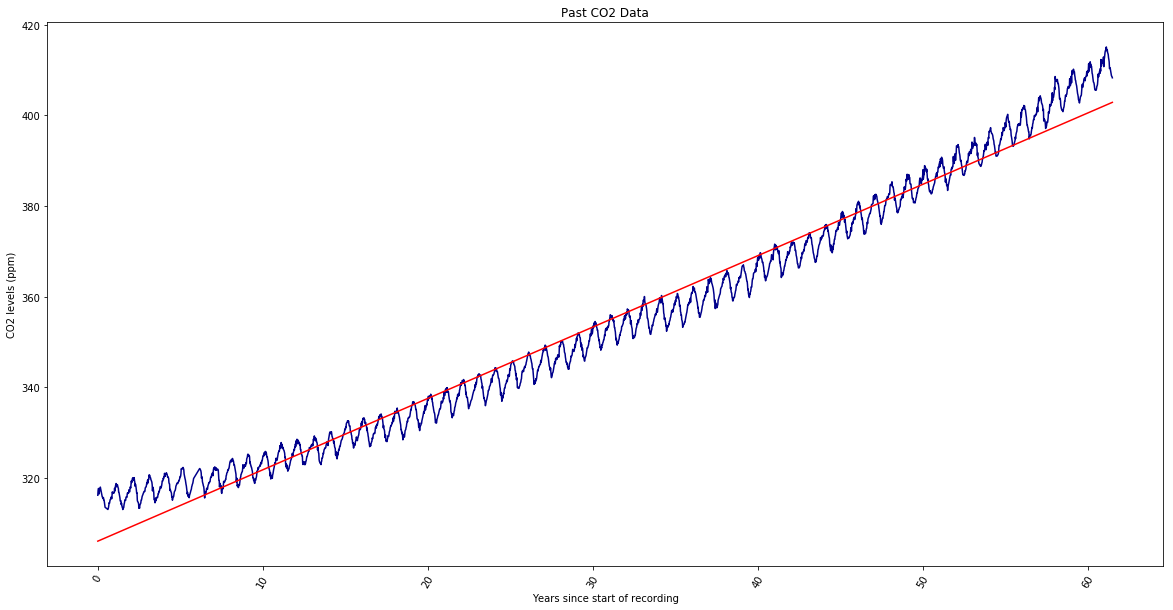

In [267]:
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values, data.CO2.values, color='darkblue')
plt.plot(data.Years.values, linear_trend_fit, color='red')

plt.title('Past CO2 Data')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Linear_trend.png")

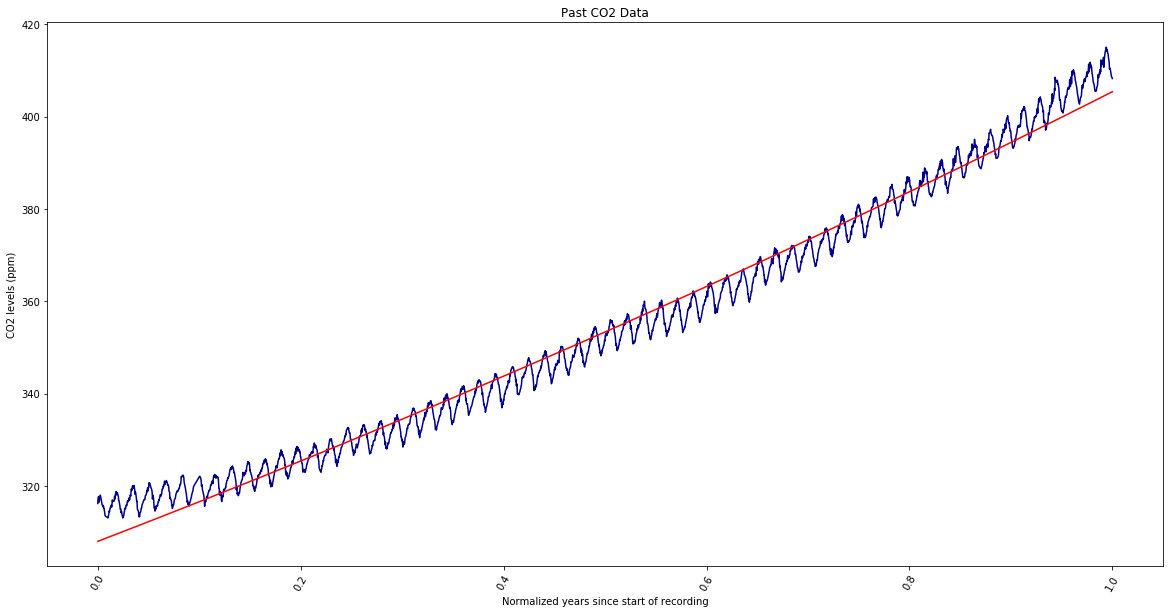

In [268]:
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values / np.max(data.Years.values), data.CO2.values, color='darkblue')
plt.plot(data.Years.values / np.max(data.Years.values), exp_trend_fit, color='red')

plt.title('Past CO2 Data')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Normalized years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Exp_trend.png")

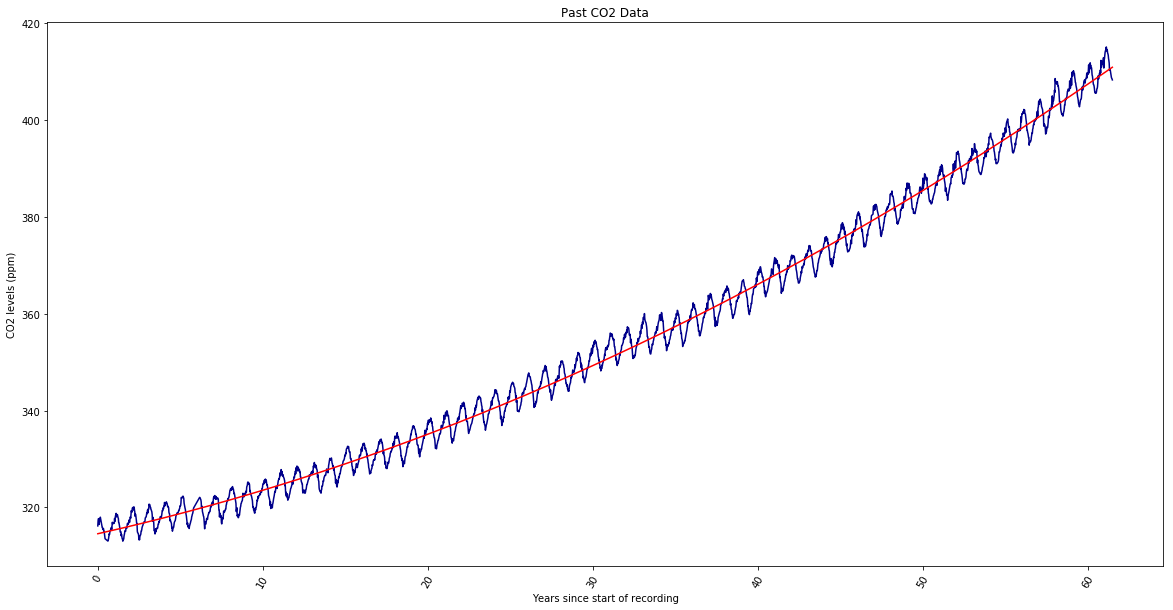

In [13]:
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values, data.CO2.values, color='darkblue')
plt.plot(data.Years.values, poly_trend_fit, color='red')

plt.title('Past CO2 Data')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Poly_trend.png")

#### Residuals

<Figure size 432x288 with 0 Axes>

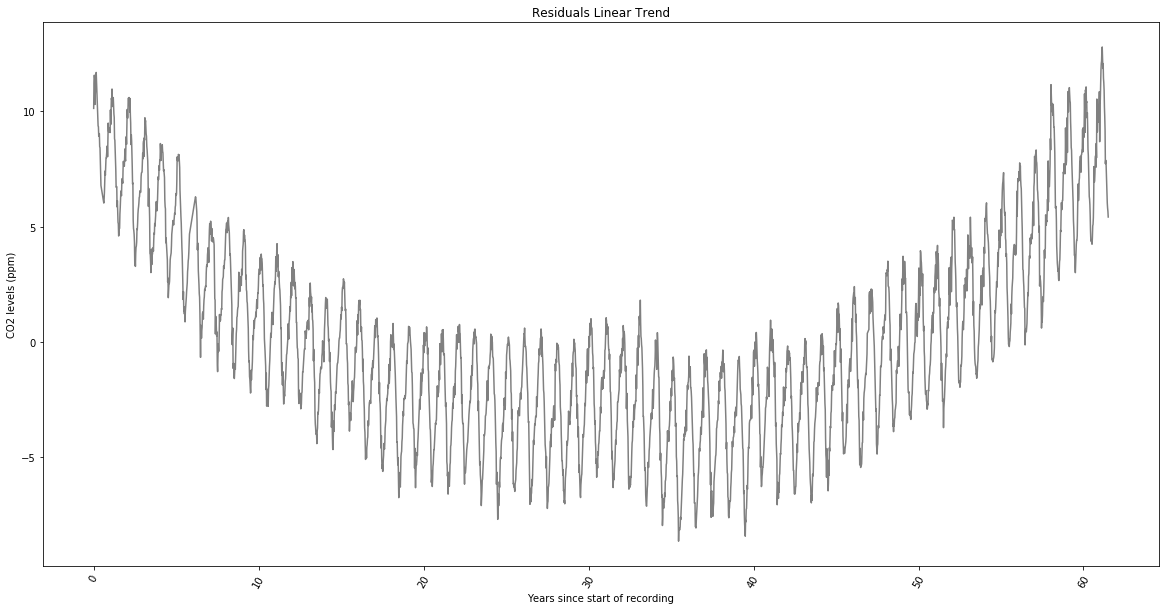

In [270]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values, data.CO2.values-linear_trend_fit, color='gray')

plt.title('Residuals Linear Trend')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Linear_residuals.png")

<Figure size 432x288 with 0 Axes>

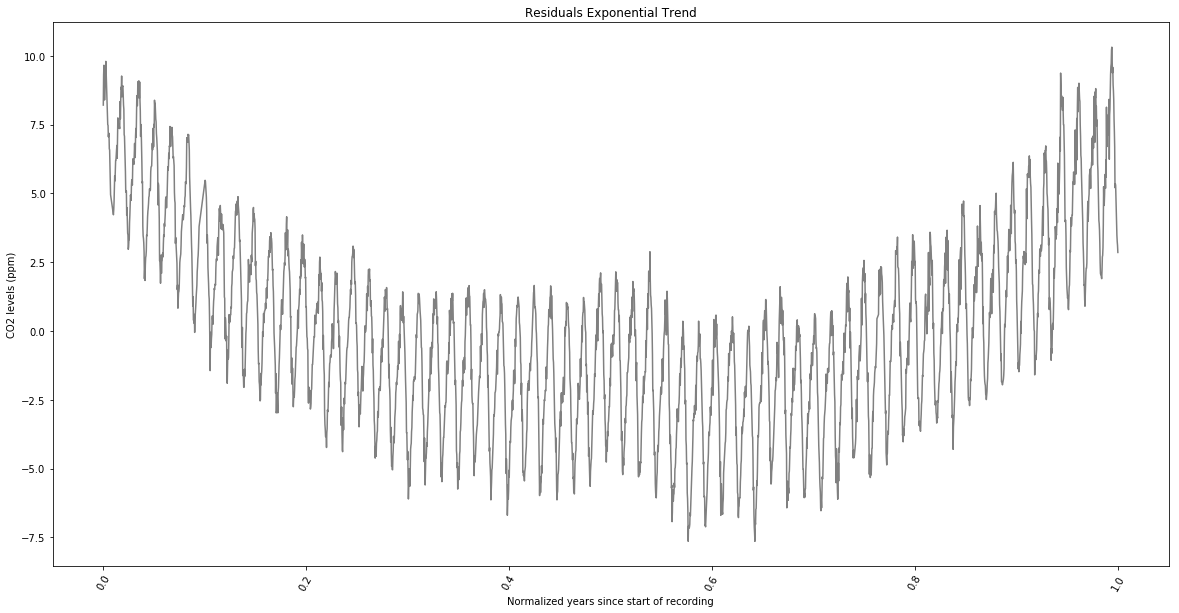

In [271]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values / np.max(data.Years.values),
         data.CO2.values-exp_trend_fit, color='gray')

plt.title('Residuals Exponential Trend')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Normalized years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Exp_residuals.png")

<Figure size 432x288 with 0 Axes>

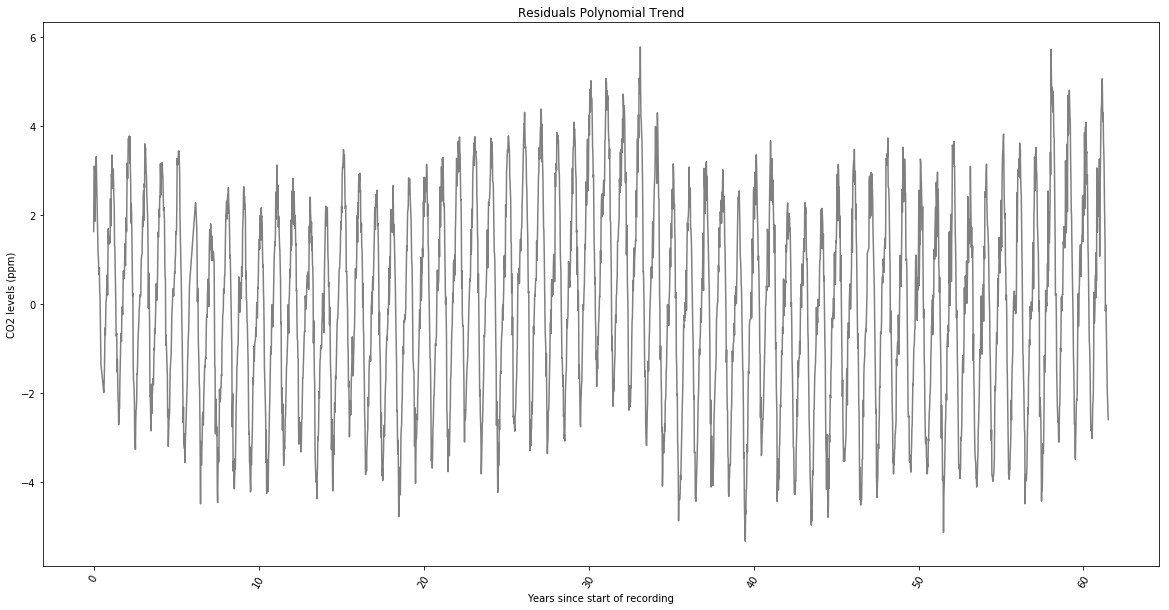

In [272]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values, data.CO2.values-poly_trend_fit, color='gray')

plt.title('Residuals Polynomial Trend')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Poly_residuals.png")

### Improved Model - Seasonality
We are picking the model with the best fit to our long-term trend (second order polynomial) and generating data for the seasonal model by detrending the data.

In [14]:
data['Detrended_CO2'] = data.CO2 - poly_trend_fit

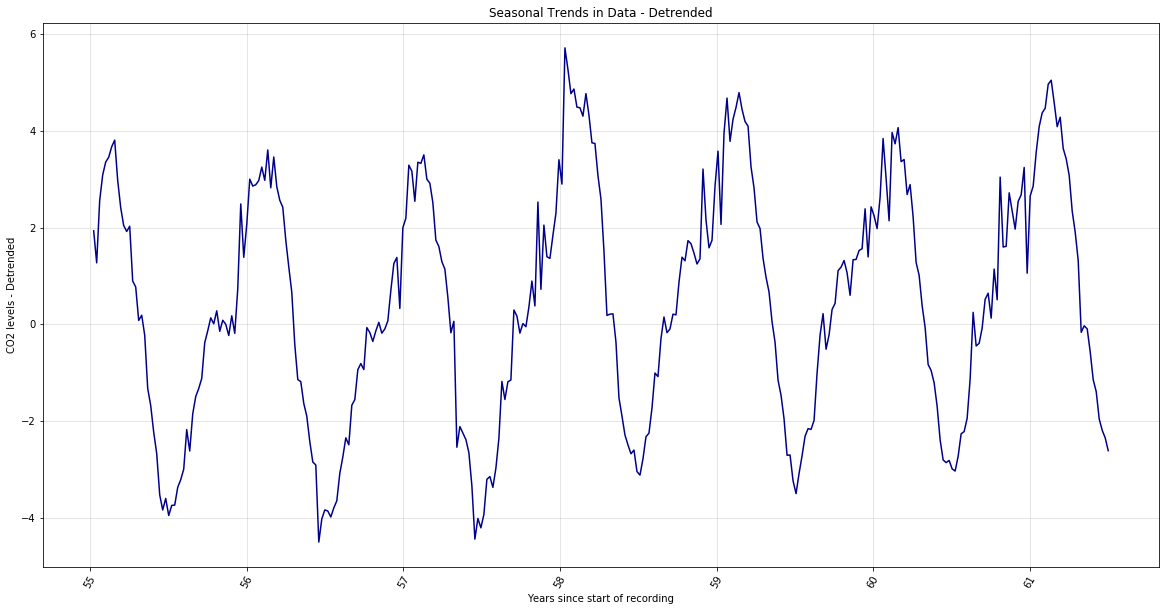

In [15]:
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values[2800:], data.Detrended_CO2.values[2800:], color='darkblue')

plt.title('Seasonal Trends in Data - Detrended')
plt.grid(alpha=0.4)
plt.ylabel('CO2 levels - Detrended')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Detrended_seasonal.png")

While the trend from further away looks nice and cyclical, something we might model with a sine function, upon further inspection I believe the trend is skewed somewhat to the right, a bit like a wave on a beach. I propose the following basic and extended models (for days):

- Sine: $c_0 sin( 2\pi t/365.25 + c_1)$
- Cosine: $c_0 sin( 2\pi t/365.25 + c_1)$
- Skewed: $-(1 + e^{t_c})\times arctan\big( \frac{sin(t_c)}{1+e^{-c_1} - cos(t_c)} \big) + c_2$, where $t_c = c_3 * t + c_4$

The skewed model I have adapted from [here](https://math.stackexchange.com/questions/1779870/asymmetrical-sine-wave). I have added the constant $c_3$ as a scaling factor for all t-values, since the basic model assumes data between 0-1 on the y-axis for positive values. We could add the period term to the skewed model, but the parameters in that model already have poor interpretability (compared to the sine model). The $c_3$ term represents the periodicity of this model and $c_4$ the right/left shift.

For our code below, we express $2\pi t$ as a single variable called the period of the function.

In [58]:
def skewed_fun(x, c0, c1, c2, c3, c4):
    '''
    Playing around with parameters for the second function here to get a sense
    of what parameters make sense and if multiple solutions exist for it.
    Note that this model really only works well on the normalized data.
    '''
    return ((-(1+np.exp(-c0* c3*x +c4)) *
            np.arctan(
            np.sin(c3*x +c4) / (1+np.exp(-c1)-np.cos(c3*x+4)) + c2 )))

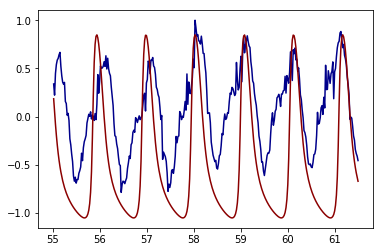

In [62]:
data_normed = [x/np.max(data.Detrended_CO2.values[2800:])
               for x in data.Detrended_CO2.values[2800:]]

y = [skewed_fun(x, 1.3, 1.3, 1, 6, 1.3) for x in data.Years.values[2800:]]
plt.plot(data.Years.values[2800:], data_normed, color='darkblue')
plt.plot(data.Years.values[2800:], y, color='darkred')
plt.show()

#### Model Code

In [16]:
stan_data_years = {
    "n" : len(data),
    "years" : data.Years.values,
    "CO2" : data.Detrended_CO2.values,
    "period" : 2*np.pi
}

stan_data_years_normalized = {
    "n" : len(data),
    "years" : data.Years.values,
    "CO2" : data.Detrended_CO2.values/np.max(data.Detrended_CO2.values),
    "period" : 2*np.pi
}

In [53]:
sine_season = """
data {
    int<lower=0> n;             // number of data
    real<lower=0> years[n];     // days since start of measurement
    real CO2[n];                // measured CO2 in ppm
    real<lower=0> period;
}

parameters {
    real<lower=0> c0;                
    real<lower=0, upper=1> c1_helper;
    real<lower=0, upper=1> c1_helper2;
    real<lower=0> noise;
}

transformed parameters {
    real c1 = atan2(c1_helper, c1_helper2);
}

model {
 
    // Priors
    c0 ~ gamma(4, 2);
    noise ~ inv_gamma(3, 2);

    for (i in 1:n) {
        CO2[i] ~ normal(c0 * sin(period*years[n] + c1), noise); 
    }
}

"""

cosine_season = """
data {
    int<lower=0> n;             // number of data
    real<lower=0> years[n];     // days since start of measurement
    real CO2[n];                // measured CO2 in ppm
    real<lower=0> period;
}

parameters {
    real<lower=0> c0;                
    real<lower=0, upper=1> c1_helper;
    real<lower=0, upper=1> c1_helper2;
    real<lower=0> noise;
}

transformed parameters {
    real<lower=0> c1 = atan2(c1_helper, c1_helper2);
}

model {
 
    // Priors
    c1_helper ~ beta(1,1);
    c1_helper2 ~ beta(1,1);
    c0 ~ gamma(4, 2);
    noise ~ inv_gamma(3, 2);

    for (i in 1:n) {
        CO2[i] ~ normal(c0 * cos(period*years[n] + c1), noise); 
    }
}

"""

skewed_season = """
data {
    int<lower=0> n;             // number of data
    real<lower=0> years[n];     // days since start of measurement
    real CO2[n];                // measured CO2 in ppm
}

parameters {                    //labelled by how they affect the function
    real<lower=0> c0_exp; 
    real<lower=0> c1_exp;
    real<lower=0> c2_updown;
    real<lower=0> c3_scale;
    real<lower=0> c4_leftright;
    real<lower=0> noise;
}

model {
 
    // Priors
    c0_exp ~ gamma(1, 1);
    c1_exp ~ gamma(1, 1);
    c2_updown ~ gamma(1, 1);
    c3_scale ~ gamma(6, 2);
    c4_leftright ~ gamma(1, 1);

    noise ~ inv_gamma(3, 2);

    for (i in 1:n) {
        CO2[i] ~ normal( (-(1 + exp(-c0_exp * c3_scale * years[n] + c4_leftright) *
                         atan( 
                         sin(c3_scale * years[n] + c4_leftright) /
                         (1 + exp(-c1_exp) - cos(c3_scale * years[n] + c4_leftright)) ))) + c2_updown, noise); 
    }
}

"""

In [54]:
sine_model = pystan.StanModel(model_code=sine_season)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_307a87f8555d21d90b0427b70b3f044e NOW.


In [35]:
cos_model = pystan.StanModel(model_code=cosine_season)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_be96808bef044f86fb5c9747471771d7 NOW.


In [151]:
skewed_model = pystan.StanModel(model_code=skewed_season)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_03dc3baca2e20b1dcfe7139f8d2d2978 NOW.


#### Results & Samples

In [55]:
sine_results = sine_model.sampling(data=stan_data_years,
                                   iter=2000, n_jobs=3,
                                   control={'adapt_delta' : 0.9999})
print(sine_results)

Inference for Stan model: anon_model_307a87f8555d21d90b0427b70b3f044e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0           1.49    0.02   0.85    0.3   0.89   1.33   1.94   3.48   2456    1.0
c1_helper    0.02  9.3e-4   0.04 3.4e-4 4.7e-3   0.01   0.03    0.1   1472    1.0
c1_helper2   0.67  5.2e-3   0.24   0.15   0.49   0.71   0.87   0.99   2182    1.0
noise        2.25  5.6e-4   0.03   2.19   2.23   2.25   2.27   2.31   2528    1.0
c1           0.03  1.2e-3   0.05 6.7e-4 8.3e-3   0.02   0.04   0.14   1564    1.0
lp__        -4126    0.05   1.64  -4130  -4127  -4125  -4125  -4124    918    1.0

Samples were drawn using NUTS at Wed Dec 18 12:47:29 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


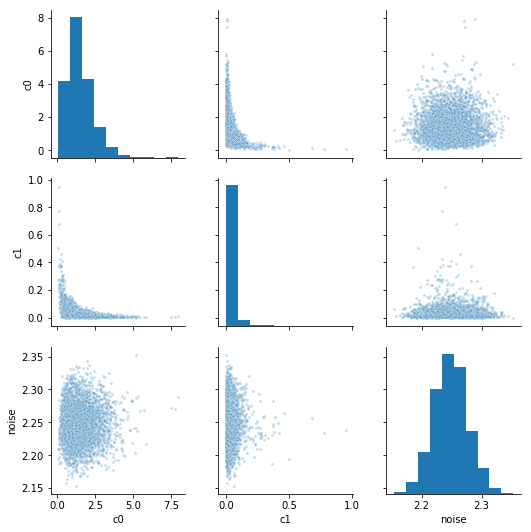

In [56]:
parameters = ['c0', 'c1', 'noise']
sine_samples = sine_results.extract()

df = pd.DataFrame(
    data=np.transpose([sine_samples[param] for param in parameters]),
    columns=parameters)
sns.pairplot(df, height=2.5, plot_kws={'marker': '.', 'alpha': 0.25})
plt.show()

In [36]:
cos_results = cos_model.sampling(data=stan_data_years,
                                 iter=2000, n_jobs=3,
                                 control={'adapt_delta' : 0.9999})
print(cos_results)

Inference for Stan model: anon_model_be96808bef044f86fb5c9747471771d7.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0           1.47    0.02   0.87   0.27   0.82    1.3   1.94   3.59   2133    1.0
c1_helper    0.67  5.0e-3   0.23   0.17    0.5   0.71   0.86   0.99   2217    1.0
c1_helper2   0.03  1.6e-3   0.05 6.8e-4 5.6e-3   0.01   0.03   0.12    874   1.01
noise        2.25  5.5e-4   0.03    2.2   2.23   2.25   2.27    2.3   2644    1.0
c1           1.53  2.1e-3   0.07   1.41   1.53   1.55   1.56   1.57    965   1.01
lp__        -4125    0.05   1.55  -4129  -4126  -4125  -4124  -4124   1150    1.0

Samples were drawn using NUTS at Wed Dec 18 12:30:41 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


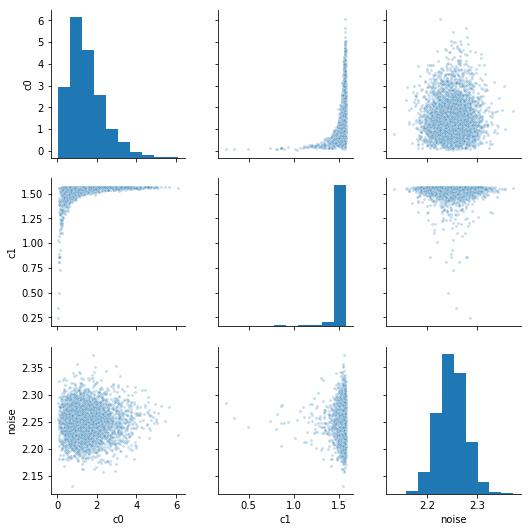

In [40]:
parameters = ['c0', 'c1', 'noise']
cos_samples = cos_results.extract()

df = pd.DataFrame(
    data=np.transpose([cos_samples[param] for param in parameters]),
    columns=parameters)
sns.pairplot(df, height=2.5, plot_kws={'marker': '.', 'alpha': 0.25})
plt.show()

In [179]:
skewed_results = skewed_model.sampling(data=stan_data_years_normalized,
                                       iter=2000, n_jobs=3,
                                       control={'adapt_delta' : 0.9999})
print(skewed_results)

Inference for Stan model: anon_model_03dc3baca2e20b1dcfe7139f8d2d2978.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0_exp         1.29    0.02    0.8    0.1   0.67   1.18   1.82   3.08   2268    1.0
c1_exp          1.3    0.02   0.79   0.08   0.67   1.22   1.82   3.04   2188    1.0
c2_updown       1.0  1.3e-4 7.0e-3   0.99    1.0    1.0    1.0   1.01   2933    1.0
c3_scale       5.91    0.06   2.09   1.78    4.5   5.88   7.28  10.03   1321    1.0
c4_leftright   1.33    0.02   0.78    0.1   0.73   1.26   1.83   3.02   2037    1.0
noise          0.39  9.8e-5 5.0e-3   0.38   0.39   0.39   0.39    0.4   2584    1.0
lp__         1383.7    0.07   2.11 1378.6 1382.5 1384.1 1385.3 1386.6    877    1.0

Samples were drawn using NUTS at Mon Dec 16 13:51:48 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat

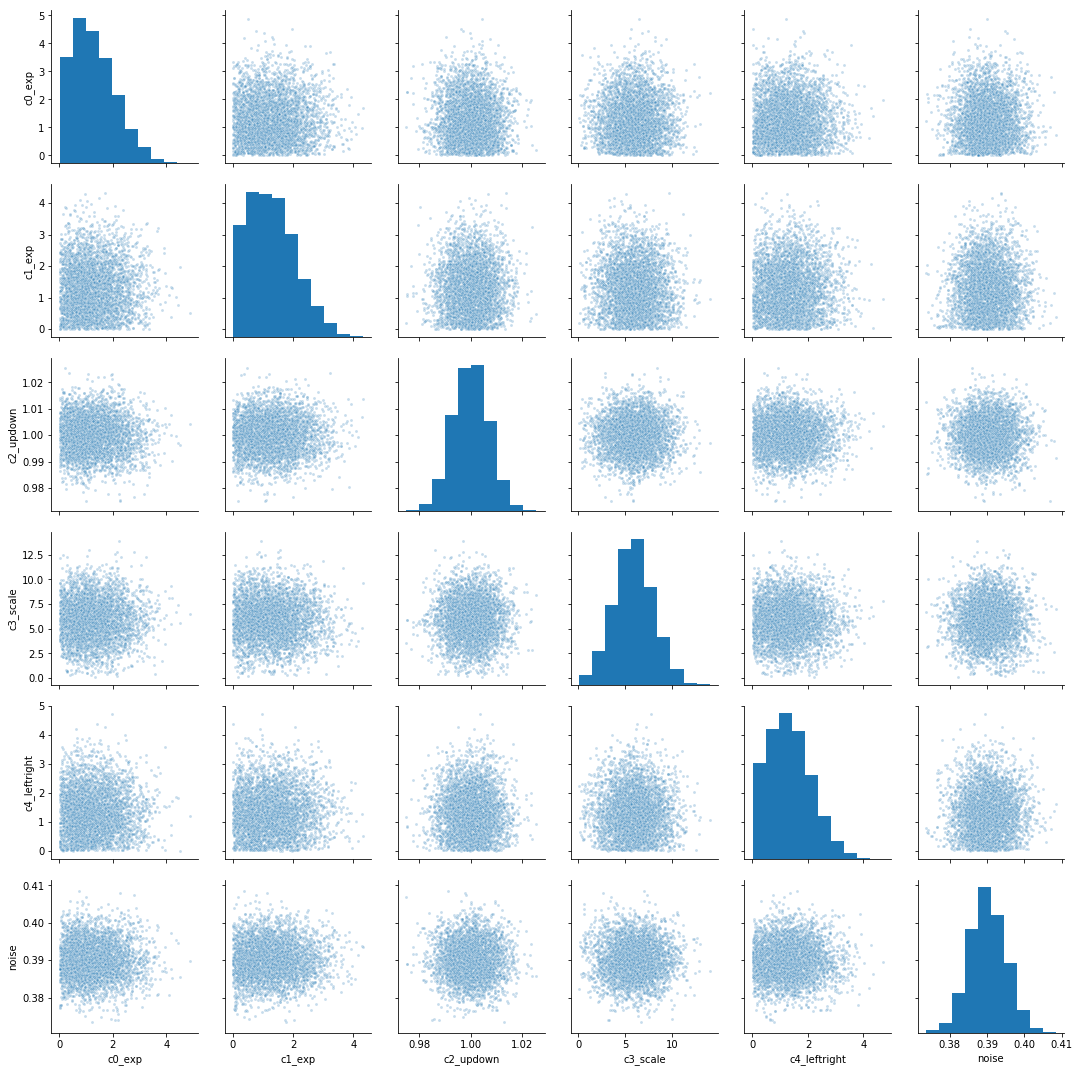

In [180]:
parameters = ['c0_exp', 'c1_exp', 'c2_updown', 'c3_scale',
              'c4_leftright', 'noise']
skewed_samples = skewed_results.extract()

df = pd.DataFrame(
    data=np.transpose([skewed_samples[param] for param in parameters]),
    columns=parameters)
sns.pairplot(df, height=2.5, plot_kws={'marker': '.', 'alpha': 0.25})
plt.show()

#### Visualization of Fit

In [ ]:
sine_season_fit = (sine_samples['c0'].mean() * np.sin(2*np.pi * data.Years.values +
                                               sine_samples['c1'].mean()))

cos_season_fit = (cos_samples['c0'].mean() * np.cos(2*np.pi * data.Years.values +
                                             cos_samples['c1'].mean()))

# skewed_season_fit = skewed_fun(data.Years.values,
#                                skewed_samples['c0_exp'].mean(),
#                                skewed_samples['c1_exp'].mean(),
#                                skewed_samples['c2_updown'].mean(),
#                                skewed_samples['c3_scale'].mean(),
#                                skewed_samples['c4_leftright'].mean())


<Figure size 432x288 with 0 Axes>

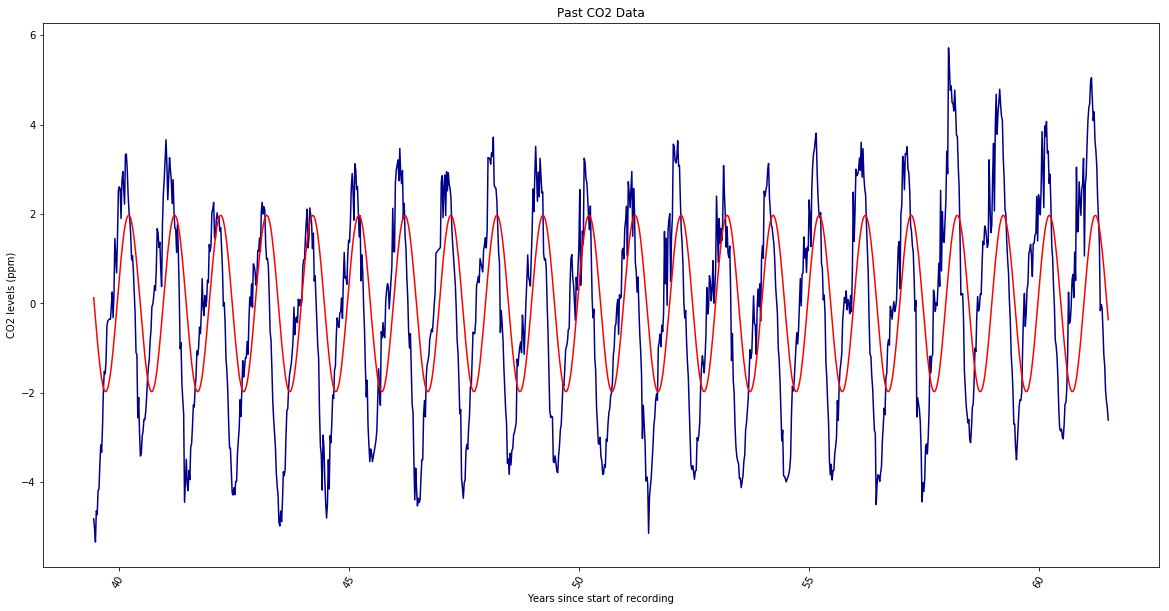

In [274]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values[2000:], data.Detrended_CO2.values[2000:], color='darkblue')
plt.plot(data.Years.values[2000:], sine_season_fit[2000:], color='red')

plt.title('Past CO2 Data')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Sine_season.png")

<Figure size 432x288 with 0 Axes>

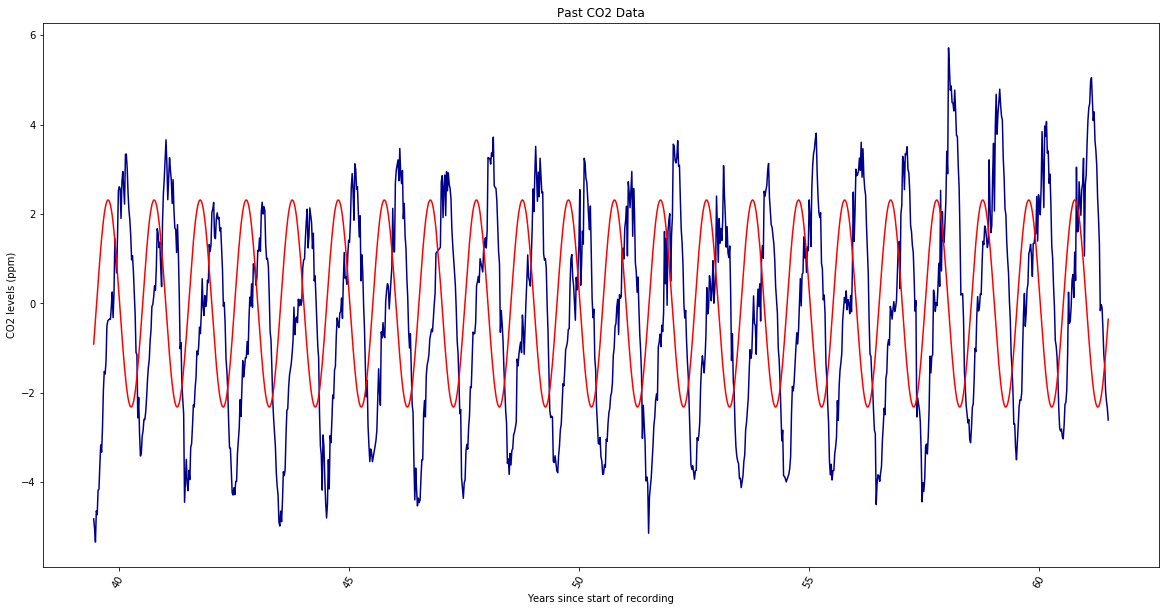

In [275]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values[2000:], data.Detrended_CO2.values[2000:], color='darkblue')
plt.plot(data.Years.values[2000:], cos_season_fit[2000:], color='red')

plt.title('Past CO2 Data')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Cos_season.png")

<Figure size 432x288 with 0 Axes>

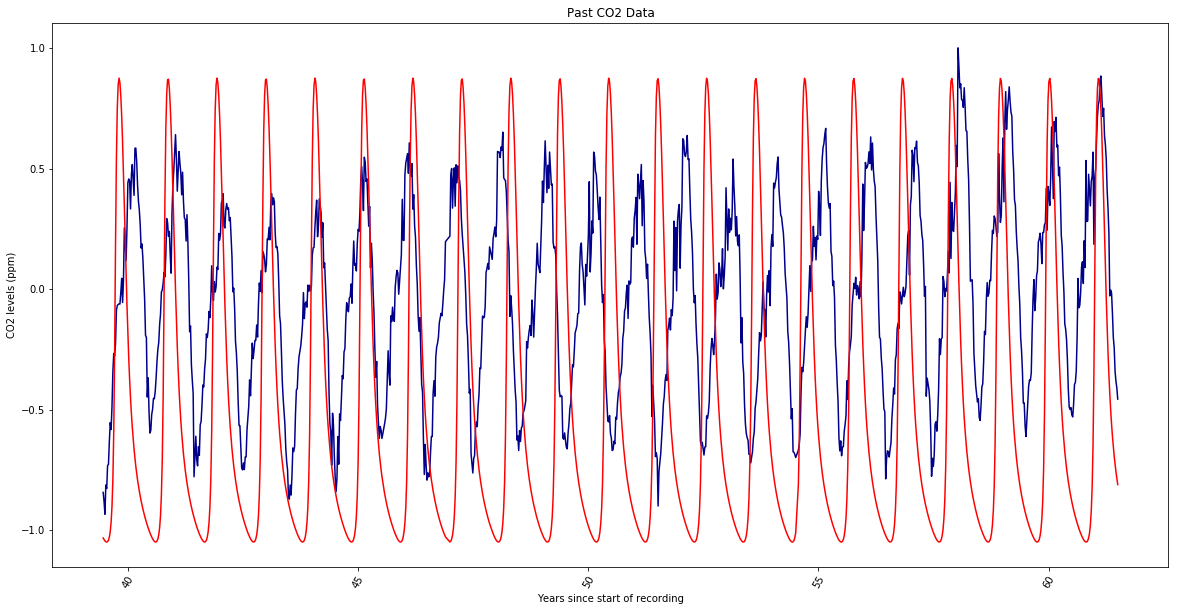

In [276]:
plt.clf()
fig = plt.figure(figsize = (20,10))

data_normed = [x/np.max(data.Detrended_CO2.values[2000:])
               for x in data.Detrended_CO2.values[2000:]]

plt.plot(data.Years.values[2000:], data_normed, color='darkblue')
plt.plot(data.Years.values[2000:], skewed_season_fit[2000:], color='red')

plt.title('Past CO2 Data')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Skewed_season.png")

#### Residuals

<Figure size 432x288 with 0 Axes>

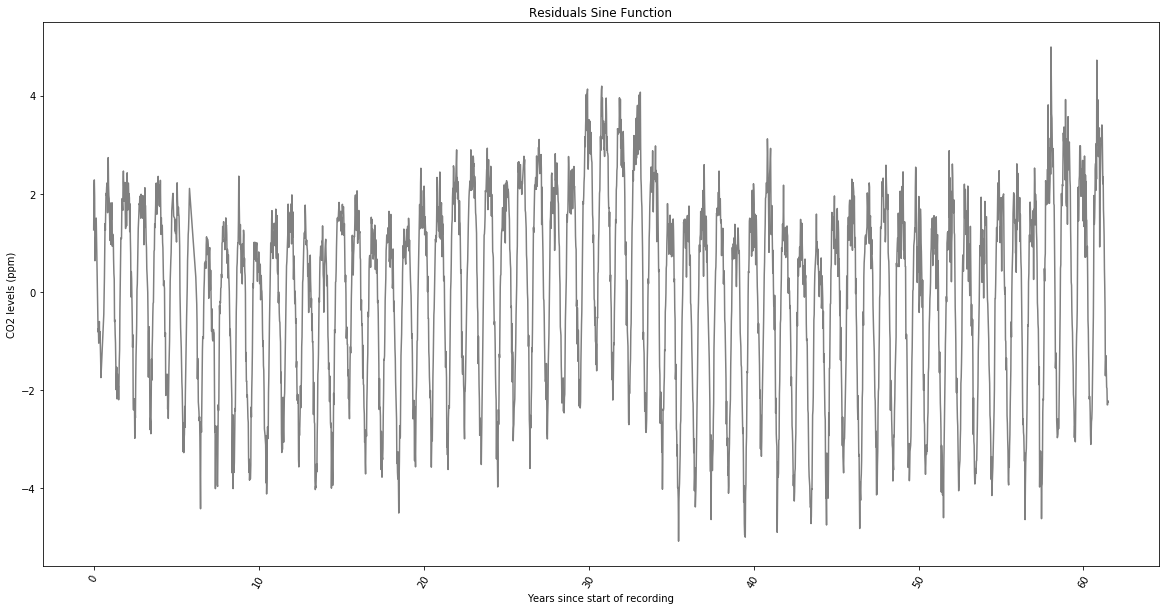

In [277]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values, data.Detrended_CO2.values-sine_season_fit, color='gray')

plt.title('Residuals Sine Function')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Sine_residuals.png")

<Figure size 432x288 with 0 Axes>

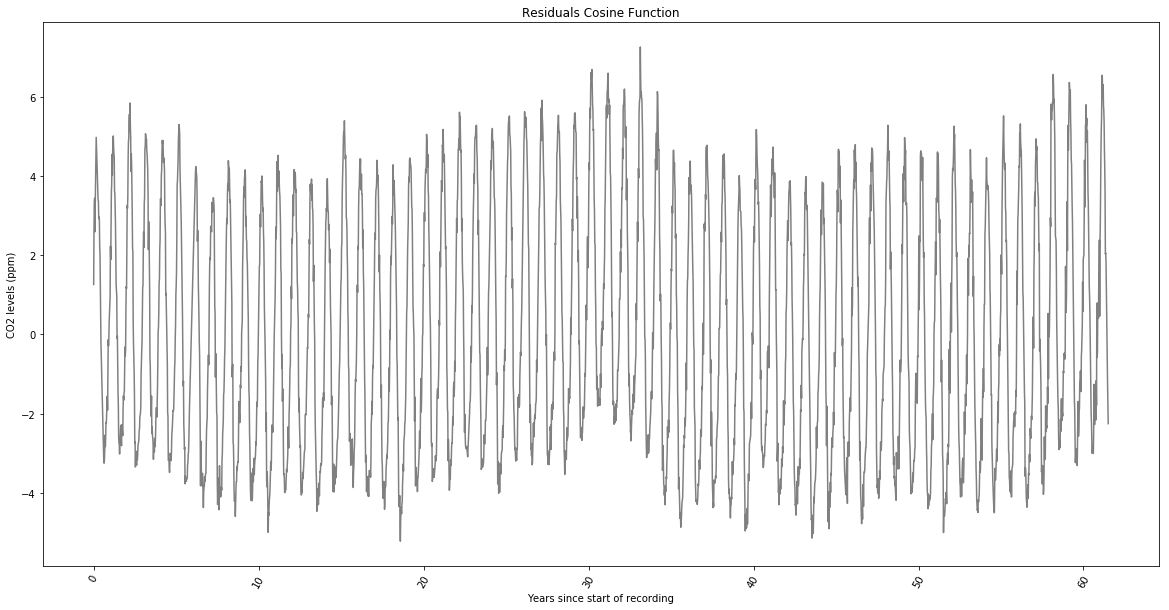

In [278]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values, data.Detrended_CO2.values-cos_season_fit, color='gray')

plt.title('Residuals Cosine Function')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Cos_residuals.png")

<Figure size 432x288 with 0 Axes>

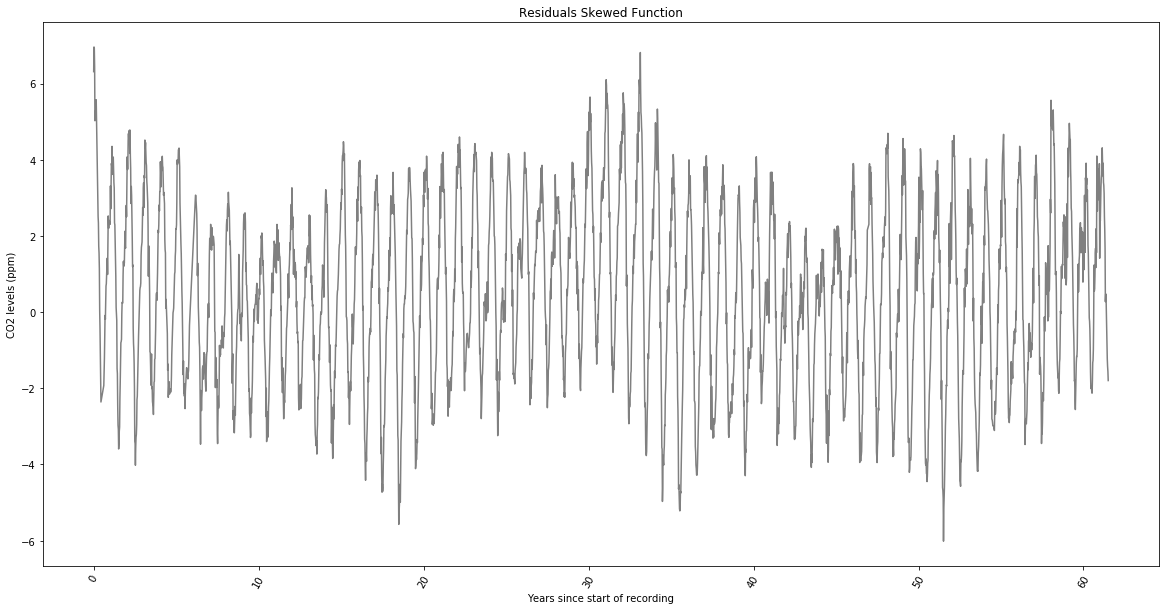

In [279]:
plt.clf()
fig = plt.figure(figsize = (20,10))

plt.plot(data.Years.values, data.Detrended_CO2.values-skewed_season_fit, color='gray')

plt.title('Residuals Skewed Function')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Years since start of recording')   
plt.xticks(rotation=60)
plt.show()

fig.savefig("Skewed_residuals.png")

In [196]:
data['Noise'] = data.Detrended_CO2.values-cos_season_fit

### Final Model

The final model is now a model with quadratic trend with cosine seasonal variation:

- Final Model: $N ( c_0 + c_1 t + c_2t^2 + c_3 sin( 2\pi t/365.25 + c_4), c_5)$

From this we can define our posterior predictive function.

In [64]:
def posterior_predictive(x, trend_samples, seasonal_samples):
    """
    Generates CO2 level predictions based on the sampled parameter
    values. Returns predictions for each sample in the shape 
    (#samples, len(x)).
    
    Inputs:
        x (list/array) Time series for which to make predictions
        in years since beginning of recording. Required.

        trend_samples & seasonal_samples (dict) Posterior distributions
        over the poly trend and cos seasonal trend parameters. Required.
    """    
    #Extracting Parameters (4000 samples each)
    c0 = trend_samples['c0']
    c1 = trend_samples['c1']
    c2 = trend_samples['c2']
    c3 = seasonal_samples['c0']
    c4 = seasonal_samples['c1']
    noise = seasonal_samples['noise']
    
    results = np.zeros( (4000, len(x)) )
    
    for s in range(0,4000):
        results[s,:] = (np.array(scipy.stats.norm.rvs(c0[s] + c1[s]*x + c2[s]*x**2 +
                                  c3[s]*np.sin(2*np.pi*x + c4[s]), noise[s])))
        
    return(results)

In [65]:
end_of_data = np.max(data.Years.values)
prediction_years = np.linspace(end_of_data, end_of_data+40, 400)
CO2_predictions = posterior_predictive(prediction_years, poly_samples, cos_samples)

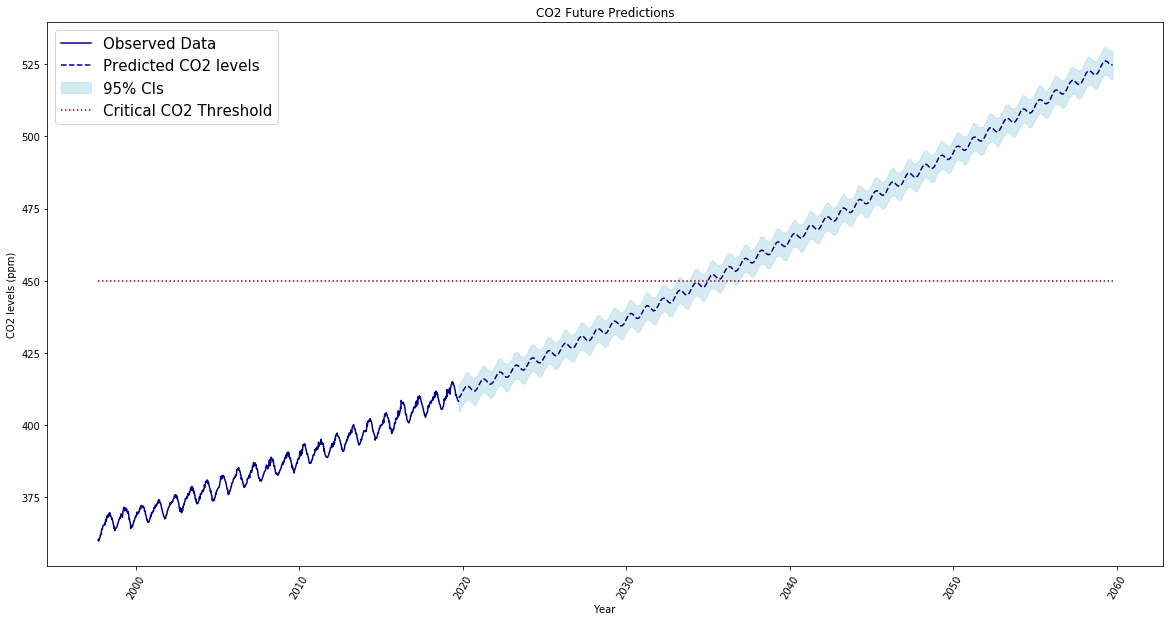

In [67]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

mean_CO2 = np.mean(CO2_predictions, axis=0)

lower_bound = np.percentile(CO2_predictions, axis=0, q=2.5)
upper_bound = np.percentile(CO2_predictions, axis=0, q=97.5)

#converting "years since recording started" to dates
start1 = pd.Timestamp(data.Date[2000])
end1 = pd.Timestamp(data.Date.iloc[-1])
end2 = pd.Timestamp('2059-09-28')   #end of data + 40 years
t1 = np.linspace(start1.value, end1.value, len(data.Years.values[2000:]))
t2 =np.linspace(end1.value, end2.value, len(prediction_years))
t1 = pd.to_datetime(t1)
t2 = pd.to_datetime(t2)

fig = plt.figure(figsize=(20,10))
plt.plot(t1, data.CO2.values[2000:], color='darkblue',
         label="Observed Data")
plt.plot(t2, mean_CO2, color='darkblue', linestyle='--',
         label="Predicted CO2 levels")

plt.fill_between(x=t2, y1=lower_bound,
                 y2=upper_bound, color='lightblue', alpha=.5, label="95% CIs") 

plt.hlines(450, start1, end2,
           color='darkred', linestyle=':', label="Critical CO2 Threshold")


plt.title('CO2 Future Predictions')
plt.ylabel('CO2 levels (ppm)')
plt.xlabel('Year ')
plt.legend(prop={'size': 15})
plt.xticks(rotation=60)

plt.show()

fig.savefig("Predictions.png")

In [391]:
print("Predicted CO2 Levels 40 years from now: ", mean_CO2[-1], 'ppm.')
print("95% Confidence Intervals: ", lower_bound[-1], upper_bound[-1])

Predicted CO2 Levels 40 years from now:  523.9748721704701 ppm.
95% Confidence Intervals:  517.5361383800783 529.5697006141031


In [393]:
print("Years since measurements when critical threshold is likely to be surpassed: ",
      prediction_years[np.min(np.argwhere(lower_bound > 450))] )

Years since measurements when critical threshold is likely to be surpassed:  78.04169561480703


In [68]:
print("Years since measurements when critical threshold might first be surpassed: ",
      prediction_years[np.min(np.argwhere(upper_bound > 450))] )

Years since measurements when critical threshold might first be surpassed:  74.93392619124813


This will be around mid 2036.

### Posterior Predictive Checks

In [45]:
x_original = data.Years.values

replicated_data = posterior_predictive(x_original, poly_samples, cos_samples)
print(np.shape(replicated_data))

(4000, 3139)


In [46]:
def hist_helper(title_name, distribution, actual, subplot_loc):
    """
    Helps with generating the subplots of the posterior predictive checks plot.
    Inputs:
        
        title_name (str) Contains the name and p-value to be plotted
        as the subtitle of the plot. Required.

        distribution (list/array) The distribution of test statistics for
        the replicated data. Required.
        
        actual (float) The test statistic of the real data. Required.
        
        subplot_loc (tuple) Numbering of the subplot. Required.
    """
    plt.subplot(*subplot_loc)
    plt.hist(distribution, color='darkblue', bins=60, density=True)
    plt.axvline(actual, color='red')
    
    plt.title(title_name)

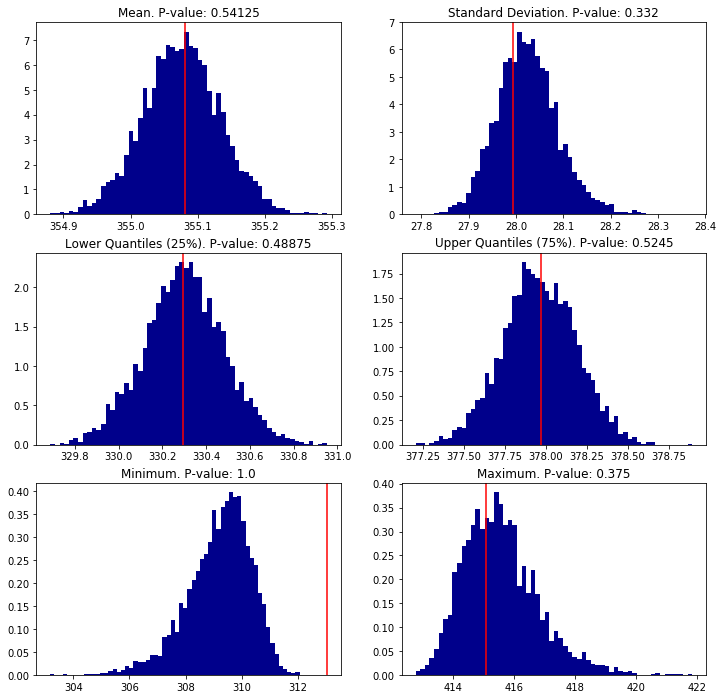

In [69]:
fig = plt.figure(figsize=(12,12))

distribution = np.mean(replicated_data, axis=1)
actual = np.mean(data.CO2.values)
outliers = (distribution <= actual).sum()
p_val = outliers/len(replicated_data)
title_name = 'Mean. P-value: ' + str(p_val)

hist_helper(title_name, distribution, actual, (3, 2, 1))


distribution = np.std(replicated_data, axis=1)
actual = np.std(data.CO2.values)
outliers = (distribution <= actual).sum()
p_val = outliers/len(replicated_data)
title_name = 'Standard Deviation. P-value: ' + str(p_val)

hist_helper(title_name, distribution, actual, (3, 2, 2))  


distribution = np.quantile(replicated_data, 0.25, axis=1)
actual = np.quantile(replicated_data, 0.25)
outliers = (distribution <= actual).sum()
p_val = outliers/len(replicated_data)
title_name = 'Lower Quantiles (25%). P-value: ' + str(p_val)

hist_helper(title_name, distribution, actual, (3, 2, 3)) 


distribution = np.quantile(replicated_data, 0.75, axis=1)
actual = np.quantile(replicated_data, 0.75)
outliers = (distribution <= actual).sum()
p_val = outliers/len(replicated_data)
title_name = 'Upper Quantiles (75%). P-value: ' + str(p_val)

hist_helper(title_name, distribution, actual, (3, 2, 4)) 


distribution = np.min(replicated_data, axis=1)
actual = np.min(data.CO2.values)
outliers = (distribution <= actual).sum()
p_val = outliers/len(replicated_data)
title_name = 'Minimum. P-value: ' + str(p_val)

hist_helper(title_name, distribution, actual, (3, 2, 5)) 


distribution = np.max(replicated_data, axis=1)
actual = np.max(data.CO2.values)
outliers = (distribution <= actual).sum()
p_val = outliers/len(replicated_data)
title_name = 'Maximum. P-value: ' + str(p_val)

hist_helper(title_name, distribution, actual, (3, 2, 6)) 


plt.show()
fig.savefig("Posterior_predictive_checks.png")